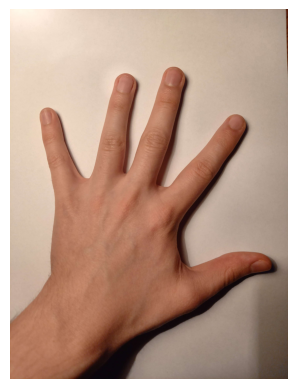

In [76]:
import cv2
import matplotlib.pyplot as plt

hand = cv2.imread('hand.jpg')

plt.axis("off")
hand = cv2.cvtColor(hand, cv2.COLOR_BGR2RGB)
plt.imshow(hand)
plt.show()

64x64 scalling

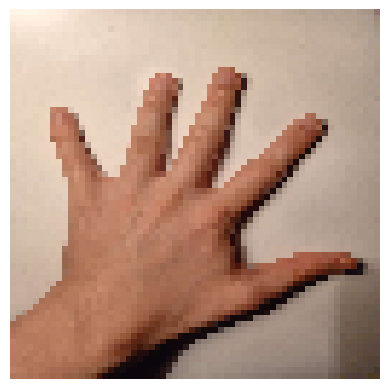

In [77]:
plt.axis("off")
hand_resized = cv2.resize(hand, (64,64))
plt.imshow(hand_resized)
plt.show()

$RGB$ to $YC_bC_r$

In [78]:
import numpy as np
YCBCR_mat = np.array([[0.299,0.587,0.114],
                      [-0.168736, -0.331264, 0.5],
                      [0.5, -0.418688, -0.081312]])
vect_b = np.array([[0],[128],[128]])
print(vect_b.shape)
hand_resized = hand_resized.reshape([hand_resized.shape[0]*hand_resized.shape[1],3])


(3, 1)


In [79]:
print(hand_resized.shape)
YCBCR_img = (YCBCR_mat@hand_resized.T) + vect_b
print(YCBCR_img.T.shape)
YCBCR_img = YCBCR_img.T.reshape([64,64,3]).astype(int)

(4096, 3)
(4096, 3)


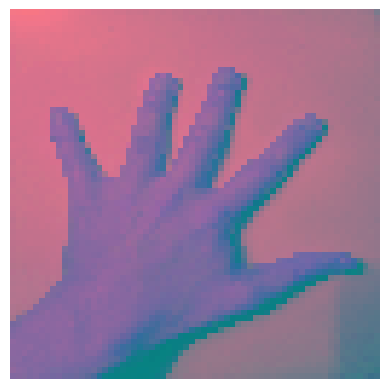

In [80]:
plt.axis("off")
plt.imshow(YCBCR_img)
plt.show()

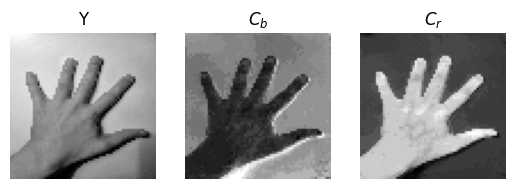

In [91]:
fig,ax = plt.subplots(1,3)
plt.gray()
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[0].set_title("Y")
ax[1].set_title("$C_b$")
ax[2].set_title("$C_r$")
ax[0].imshow(YCBCR_img[:,:,0])
ax[1].imshow(YCBCR_img[:,:,1])
ax[2].imshow(YCBCR_img[:,:,2])
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


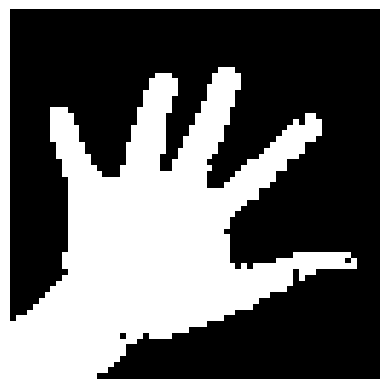

In [116]:
def binaryzation(img,Ta,Tb,Tc,Td):
    img_2 = np.zeros(img.shape[:-1])
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_2[i,j] = (Ta<img[i,j,1]<Tb) and Tc<img[i,j,1]<Td
    return img_2
img_bin = binaryzation(YCBCR_img,100,110,100,110).astype(int)
print(img_bin)
plt.axis("off")
plt.imshow(img_bin)
plt.show()

Median blur

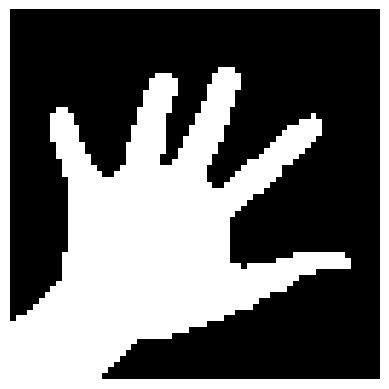

In [123]:
median = cv2.medianBlur(img_bin.astype('uint16'), 3)
plt.axis("off")
plt.imshow(median)
plt.show()

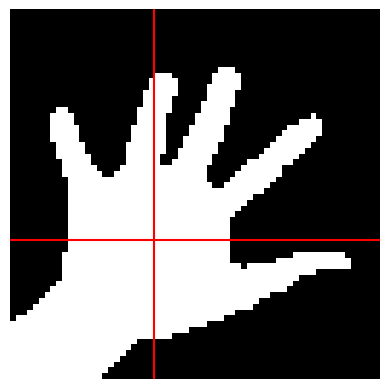

In [131]:
m00 = np.sum(median)
m10 = np.sum(np.array([[median[i,j]*i for j in range(len(median[0]))] for i in range(len(median))]))
m01 = np.sum(np.array([[median[i,j]*j for j in range(len(median[0]))] for i in range(len(median))]))
xsc = m10/m00
ysc = m01/m00
plt.axis("off")
plt.imshow(median)
plt.axhline(xsc,color = "red")
plt.axvline(ysc,color = "red")
plt.show()

In [134]:
width = 64
height = 64
maxval = 255
ppm_header = f'P6 {width} {height} {maxval}\n'

with open('hand.ppm', 'wb') as f:
    f.write(bytearray(ppm_header, 'ascii'))
    cv2.resize(hand, (64,64)).tofile(f)